<a href="https://colab.research.google.com/github/edojatheophilus/AI-vs-Human-Text-Detection/blob/Development/Random_forest_%26_SVM_100000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
import gzip

# Load the compressed pickle file with the PCA features
with gzip.open('PCA_features_data.pkl.gz', 'rb') as f:
    df_combined = pickle.load(f)


display(df_combined)

generated       PC1        PC2       PC3       PC4       PC5  \
0             0.0  4.625756  -6.139121 -8.183926 -1.584481  0.898296   
1             0.0  8.425920  -6.755080 -7.253139 -1.888090  0.496328   
2             0.0  5.188977  -6.241041 -2.800961 -1.448331  1.135069   
3             0.0  4.845310  -7.421351 -6.481223 -2.967532  0.678225   
4             0.0  4.480856  -6.581754 -8.503830 -3.141797  0.163962   
...           ...       ...        ...       ...       ...       ...   
487230        0.0 -1.781958   2.797930 -2.654326  4.998787 -0.793187   
487231        0.0  6.045926   7.637077 -1.069825 -2.081006  0.796807   
487232        1.0  7.760859  -5.487093  4.687000  2.892875 -0.596988   
487233        0.0 -5.579807   1.240581 -1.280713 -2.936650 -1.147940   
487234        0.0  5.426031  10.118840 -2.183115 -1.454284  0.101284   

             PC6       PC7       PC8       PC9  ...     PC191     PC192  \
0      -0.745829  1.233761 -2.972068  1.018547  ... -0.792867  0.592858   
1      -0.949115  2.146534 -4.172021  1.647835  ...  0.599653  2.219176   
2      -0.518902  0.916541 -1.691716  2.567332  ... -0.655248 -0.949802   
3       1.111468  1.775790 -1.344532  3.140376  ...  0.139977 -0.887881   
4      -0.153618  1.306802 -4.705047  2.998410  ...  0.451199 -0.652226   
...          ...       ...       ...       ...  ...       ...       ...   
487230 -2.465014  2.104899  2.163346 -3.011408  ... -0.076304 -0.124609   
487231  1.278279  0.979944  0.059654  2.203298  ...  0.172353  0.682214   
487232 -1.749980 -1.034547  1.737466 -2.729374  ...  0.307511  2.183981   
487233  0.783928 -0.815600 -1.108313 -3.451299  ...  0.677915 -1.082512   
487234 -0.157531 -1.121144 -0.108443 -1.088987  ...  1.281158  1.570645   

           PC193     PC194     PC195     PC196     PC197     PC198     PC199  \
0       0.422301  0.835457  1.464719 -0.104244  1.001682  0.216649  0.407391   
1       1.953602  1.491739 -0.537354  1.725558  1.439251  0.268123  1.514510   
2      -0.882912  0.389224  0.282645 -0.538652  1.104475 -0.863450  0.560406   
3       0.292654 -0.513490  0.659874  0.923782  1.119892 -2.126562 -0.276688   
4      -1.255350 -0.537535 -0.332195  1.657600 -0.542583  1.016093  1.414892   
...          ...       ...       ...       ...       ...       ...       ...   
487230 -0.300887  1.023233 -0.254262  0.729252  1.894161  1.517513  1.040791   
487231 -0.875645 -0.416846 -0.650872 -0.199280 -0.340213  0.306073  0.145792   
487232 -0.702647  1.373802  0.800319  0.801643  1.718445 -0.297520  2.468580   
487233 -0.281941  0.948264  0.427247  2.128820 -0.690887 -0.263991 -0.714022   
487234 -1.953598  0.748882 -0.495235  0.357885  0.270606 -1.266110 -1.078052   

           PC200  
0      -0.430058  
1       0.637347  
2      -0.575510  
3      -0.407697  
4       1.157998  
...          ...  
487230 -0.991620  
487231 -0.263435  
487232  0.867459  
487233 -0.451139  
487234  0.083243  

[487235 rows x 201 columns]

In [36]:
import pandas as pd

# Filter rows where 'generated' column is 0 and select 20,000 rows
df_generated_0 = df_combined[df_combined['generated'] == 0].head(50000)

# Filter rows where 'generated' column is 1 and select 20,000 rows
df_generated_1 = df_combined[df_combined['generated'] == 1].head(50000)

# Concatenate the two dataframes
new_df = pd.concat([df_generated_0, df_generated_1], ignore_index=True)

# Optionally, shuffle the new dataframe
new_df = new_df.sample(frac=1).reset_index(drop=True)

# Print the shape of the new dataframe to verify
print("Shape of the new dataframe:", new_df.shape)


Shape of the new dataframe: (100000, 201)


## Data Splitting

In [37]:
from sklearn.model_selection import train_test_split

# Shuffle DataFrame to ensure random selection of records
df_shuffled = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate 100 records for unseen testing
df_unseen = df_shuffled[:100]
df_rest = df_shuffled[100:]

# Train-test split on df_rest
#X = df_rest.drop(['generated', 'text'], axis=1)
X = df_rest.drop(['generated'], axis=1)
y = df_rest['generated']

In [38]:
df_unseen_target = df_unseen['generated'] # selecting target variable
#df_unseen_test = df_unseen.drop(['generated', 'text'], axis=1) # dropping email column since it is empty, and dropping text after obtaining tf-idf matrix
df_unseen_test = df_unseen.drop(['generated'], axis=1)
df_unseen_test

PC1        PC2       PC3        PC4       PC5       PC6       PC7  \
0    3.567775  -2.359616  5.101063  10.124140 -2.248659  5.017158 -4.254883   
1   -5.626466   0.710076 -2.811472  -2.844243 -2.252192 -0.572014 -0.115457   
2   10.665509   9.516217  3.270447  -1.002023  0.513811  0.027058  1.127568   
3   10.260235  10.943237  0.679763  -0.330158 -0.354573 -1.154246  0.411079   
4    1.386269  -0.391586  6.623063   3.557431  9.893103 -4.811395 -1.784303   
..        ...        ...       ...        ...       ...       ...       ...   
95   3.623497  -4.754336 -8.765190  -1.352790  1.058162  0.254821  3.084184   
96  13.169547 -13.291593 -2.857682  -1.555040 -0.495136 -3.554203 -1.087492   
97   8.547529  -8.757443  3.805730  -0.040617  3.654764  5.148181  0.008686   
98   3.737432  -1.921337  4.650140   1.636605  3.430521  4.883337  2.279738   
99   2.537144  -0.908721  3.081834  10.861778 -1.705030 -1.129154  3.900538   

         PC8       PC9      PC10  ...     PC191     PC192     PC193     PC194  \
0  -5.003105  1.722885 -0.011964  ... -0.345951  0.145067  1.216350  0.391873   
1  -1.192825  7.763591 -0.600014  ... -0.771655  0.170236  0.621855 -1.644583   
2  -1.544932  2.003527  0.229211  ... -0.177839 -0.829603 -1.346509  0.515094   
3   0.355659 -0.052724  0.026895  ... -1.566217 -0.648135 -0.381041 -1.048476   
4  -0.468329  0.217802  2.783838  ... -0.653835  0.624938 -1.281032  1.320732   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -3.547933  3.874185  1.750521  ... -0.825712 -1.616147  1.276333  0.227235   
96 -2.273137 -2.194715 -1.325252  ... -0.273337  1.136100 -0.520922 -0.612391   
97  7.206254 -0.925201  0.314001  ...  0.226023  1.182151 -0.869869  0.994462   
98  4.701483  0.998008  1.411640  ...  0.932770 -0.979546  1.132092 -0.099367   
99  0.187575 -1.492360 -0.836008  ...  0.481534  1.053824 -1.122344 -0.336159   

       PC195     PC196     PC197     PC198     PC199     PC200  
0  -0.262465 -0.094425  0.611556  0.480508 -0.926064  1.005904  
1  -1.346290 -0.311843  1.385514  0.465822  0.127372  0.557344  
2   0.516204 -0.405571  0.404989  0.738995  0.385543  0.239090  
3  -0.323649  0.557994  0.366443  0.176501 -1.043881  1.137750  
4  -0.096061  0.698043 -1.204127 -0.211189 -0.641947  1.674584  
..       ...       ...       ...       ...       ...       ...  
95 -0.301185  0.106388 -0.344019 -0.392147  0.189580  0.926213  
96 -0.576152 -0.506084  0.857921  0.119585  1.179446  0.303255  
97  0.228628 -0.513687  0.585961  0.410025  0.017589  1.118429  
98 -3.630807  0.634461  0.341144 -0.446509 -0.276844 -0.897662  
99 -0.304013 -0.394144 -0.433577 -1.168034  0.301301  0.074573  

[100 rows x 200 columns]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(79920, 200)

In [41]:
X_test.shape

(19980, 200)

In [42]:
df_unseen_test.shape

(100, 200)

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to the training set, the test set, unseen set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_unseen_test_scaled = scaler.transform(df_unseen_test)

In [44]:
import pickle
import gzip

# Save the StandardScaler object, scaled training set, scaled test set, and scaled unseen test set to a dictionary
scaler_data = {
    'scaler': scaler,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'df_unseen_test_scaled': df_unseen_test_scaled
}

# Save the dictionary to a compressed pickle file
with gzip.open('sample_scaler_and_scaled_data.pkl.gz', 'wb') as f:
    pickle.dump(scaler_data, f)

In [45]:
# Load the compressed pickle file
with gzip.open('sample_scaler_and_scaled_data.pkl.gz', 'rb') as f:
    loaded_scaler_data = pickle.load(f)

# Retrieve the scaler and scaled data from the loaded dictionary
scaler = loaded_scaler_data['scaler']
X_train_scaled = loaded_scaler_data['X_train_scaled']
X_test_scaled = loaded_scaler_data['X_test_scaled']
df_unseen_test_scaled = loaded_scaler_data['df_unseen_test_scaled']

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train_scaled, y_train)

# Evaluate the model on unseen data
rf_pred = rf_clf.predict(df_unseen_test_scaled)
rf_accuracy = accuracy_score(df_unseen_target, rf_pred)
print(f"Random Forest Accuracy on df unseen test: {rf_accuracy}")

# Evaluate the model on test data
rf_pred = rf_clf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy on y test: {rf_accuracy}")

Random Forest Accuracy on df unseen test: 1.0
Random Forest Accuracy on y test: 0.9894894894894894


In [47]:
import pickle
import gzip

# Save the Random Forest classifier, scaler, and scaled data to a dictionary
model_data = {
    'rf_clf': rf_clf,
    'scaler': scaler,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'df_unseen_test_scaled': df_unseen_test_scaled
}

# Save the dictionary to a compressed pickle file
with gzip.open('sample_random_model_and_scaling_data.pkl.gz', 'wb') as f:
    pickle.dump(model_data, f)


### Random Forest Interpretability

In [48]:
!pip install shap
!pip install lime

In [49]:
import pandas as pd
# Random Forest Classifier Feature Importance
feature_importance = rf_clf.feature_importances_

# Get feature names from DataFrame columns
feature_names = new_df.drop(['generated'], axis=1).columns
target = new_df['generated']

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame based on the importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset the index of the DataFrame
feature_importance_df = feature_importance_df.reset_index(drop=True)

# Display the DataFrame
feature_importance_df.head(15)

Feature  Importance
0      PC3    0.218114
1      PC1    0.103511
2      PC2    0.054080
3      PC8    0.030705
4      PC4    0.029307
5     PC17    0.025584
6      PC6    0.024218
7      PC5    0.020343
8     PC15    0.019826
9     PC28    0.017908
10    PC21    0.015479
11    PC27    0.014669
12    PC29    0.014338
13    PC14    0.014080
14    PC10    0.014042

In [50]:
import shap
import matplotlib.pyplot as plt

# Select a subset of test data for SHAP value computation
subset_index = 1000  # using the first 100 samples
X_test_subset = X_test_scaled[:subset_index]


In [51]:
print("Shape of X_test_subset:", X_test_subset.shape)

Shape of X_test_subset: (1000, 200)


In [52]:
print("Shape of X_train_scaled:", X_train_scaled.shape)

Shape of X_train_scaled: (79920, 200)


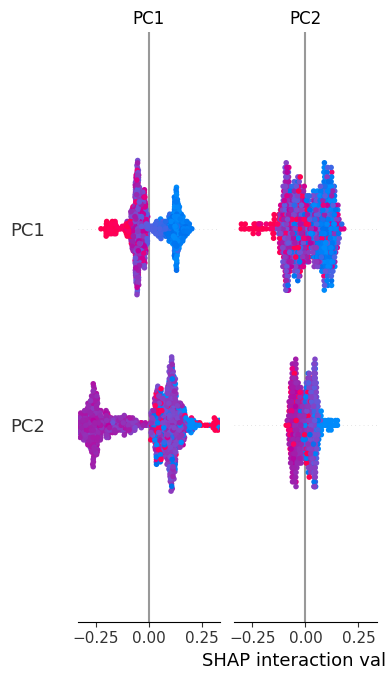

In [53]:
# Create a TreeExplainer using the random forest model
explainer = shap.TreeExplainer(rf_clf)

# Compute SHAP values for the test set without specifying feature_perturbation
shap_values = explainer.shap_values(X_test_subset, check_additivity=False)

# Plot the summary plot
shap.summary_plot(shap_values, X_test_subset, feature_names=df_combined.drop(['generated'], axis=1).columns)


In [54]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=feature_names, class_names=['not_generated', 'generated'], mode='classification')
i = 1
exp = explainer.explain_instance(X_test_scaled[i], rf_clf.predict_proba, num_features=30)
exp.show_in_notebook()

In [55]:
# Convert y_test to a pandas Series if it's not already
y_test_series = pd.Series(y_test, index=X_test.index)

# Identifying misclassified instances
misclassified_indices = y_test_series[rf_pred != y_test_series].index
misclassified = X_test.loc[misclassified_indices]
misclassified['true_label'] = y_test_series.loc[misclassified_indices].values
misclassified['predicted_label'] = rf_pred[rf_pred != y_test_series].astype(int)

# Storing the misclassified instances into a new DataFrame
misclassified_df = pd.DataFrame(misclassified)

# Printing the misclassified instances
misclassified_df[misclassified_df['true_label'] != misclassified_df['predicted_label']].head(20)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
80106 -0.460297 -0.825488  1.702998 -1.857530  0.156414  1.718985  1.533900   
49573 -4.894432 -0.655858  0.627673 -3.536974 -0.511010  2.898435  1.722905   
53891 -3.233123  1.995160 -3.850620  6.136231 -0.360313 -3.895833  4.061241   
64124 -5.394545  0.796691  0.480479 -0.563821 -2.438048 -0.810719 -3.286913   
64724 -4.377465  1.547423  1.467840 -4.899085 -2.612214  1.374066 -0.605933   
2274  -1.561668  0.348621  0.569397 -0.105868 -0.580075  0.482352 -1.126239   
60551 -0.157073 -1.723017  5.297941 -1.595646  0.387856  0.492590  2.093242   
64071 -5.066267 -0.788474  1.401186 -3.298129  0.648188  1.498075  1.052900   
61646 -1.200509 -0.823544  2.297317  1.999760  3.610426 -1.507032 -3.639541   
88295 -4.369898  0.565162  0.532888 -1.780967 -3.134904 -0.183017 -0.747846   
88125 -6.182228  1.209789 -3.504912 -0.185114 -3.260502 -1.788907 -0.573720   
56808 -1.519599 -1.298423  6.426972 -3.125340 -0.119195  1.444760  3.102331   
56897 -4.080682 -0.397177 -1.257867 -1.656232 -1.729945 -0.739216 -0.601450   
67512 -4.463977  0.013590  2.438076 -2.271132  0.405869  0.381926  1.687836   
23808 -1.322773 -1.075761 -1.208017 -0.095681  2.193491  6.515807  1.132731   
12624 -5.805633  0.166874  1.139971 -3.116589 -2.162533 -0.189122  0.566590   
40358 -2.729117  0.066245  0.649476  8.739371 -1.386446  4.117530 -8.037955   
71882 -3.325925 -1.577681  4.761485 -4.157975 -0.113006  1.855223  2.763290   
39057 -0.884031  0.046830  2.537570 -1.626386 -0.953840 -0.752350  0.661413   
13897 -4.184143  1.807088  1.503618 -4.993094 -2.649932  1.340342 -0.615203   

            PC8        PC9      PC10  ...     PC193     PC194     PC195  \
80106 -0.455943  -2.474386  0.016351  ... -0.461197  0.366299 -0.045663   
49573 -1.829524  -2.975672 -0.351959  ...  0.467461  0.228086 -0.282137   
53891  2.244619  -1.630660 -2.374298  ...  0.184426 -0.207469  0.393467   
64124  1.199386   2.470682 -1.963222  ... -1.127384 -0.311807 -0.869505   
64724 -0.840232  -6.388806 -2.988975  ...  1.009407 -1.092148 -0.197909   
2274   2.693474   3.198594 -1.417642  ... -1.038539 -1.650682  1.054256   
60551 -3.159212   0.398521  1.236603  ... -1.458071  1.000214  0.691417   
64071 -2.110177  -2.247836 -1.074068  ...  0.328015  0.873303  0.734170   
61646  1.218581  -1.273249  0.871385  ... -0.627593 -1.396953  0.054715   
88295  1.825611   3.594341 -2.188732  ... -0.041560 -1.272617  0.232352   
88125 -0.221594   4.236820  0.150463  ...  1.611545 -0.465468 -0.003703   
56808 -3.644494  -0.830512  1.162871  ... -1.614891  0.821010 -0.512503   
56897  0.432356   0.872150  0.008922  ... -1.463330  0.501097 -1.602437   
67512 -4.832265   0.237825 -0.990422  ... -0.967673  1.199156  0.167658   
23808  9.239798   0.033293  1.113045  ...  1.280075 -0.945877  0.684854   
12624 -1.634839  -2.921709  0.463532  ...  1.775820  0.953962  0.428982   
40358 -3.781307  -0.353730 -1.736957  ... -1.035952 -0.121691  1.190423   
71882 -3.730486  -1.075685  0.653646  ... -0.150532  0.283197  1.327944   
39057  0.652727  10.519151 -3.734548  ...  1.140944 -0.252694  0.343820   
13897 -0.796464  -6.439230 -2.883899  ...  1.063349 -1.118330 -0.233068   

          PC196     PC197     PC198     PC199     PC200  true_label  \
80106 -0.040046  0.351549  0.389070 -1.313729  1.113637         0.0   
49573 -1.681825 -1.045207 -0.486527  0.327143  0.595011         1.0   
53891 -0.613345  0.432252 -0.154140  1.556229 -0.909598         1.0   
64124  0.912150  0.686901  1.714017 -2.713369 -1.766628         0.0   
64724  0.636426  0.074743  0.592804 -1.927484 -0.624341         1.0   
2274   0.292881  2.834260  2.665151 -0.015045 -1.678450         0.0   
60551 -0.482645  0.326959 -0.867057  1.190323  0.749561         0.0   
64071 -0.526769  0.036452  0.579111 -1.521734 -1.031688         1.0   
61646  0.998993 -0.126958 -0.222030 -1.009832  0.243744         0.0   
88295 -0.644195 -0.755337 -0.246576 -0.300535 -0.385829         1.

In [56]:
from sklearn.tree import export_graphviz
import graphviz

# Selecting the first tree estimator from the Random Forest
tree_estimator = rf_clf.estimators_[0]

# Export as dot file
dot_data = export_graphviz(tree_estimator, out_file=None,
                           feature_names=feature_names,
                           class_names=['Not Generated', 'Generated'],
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


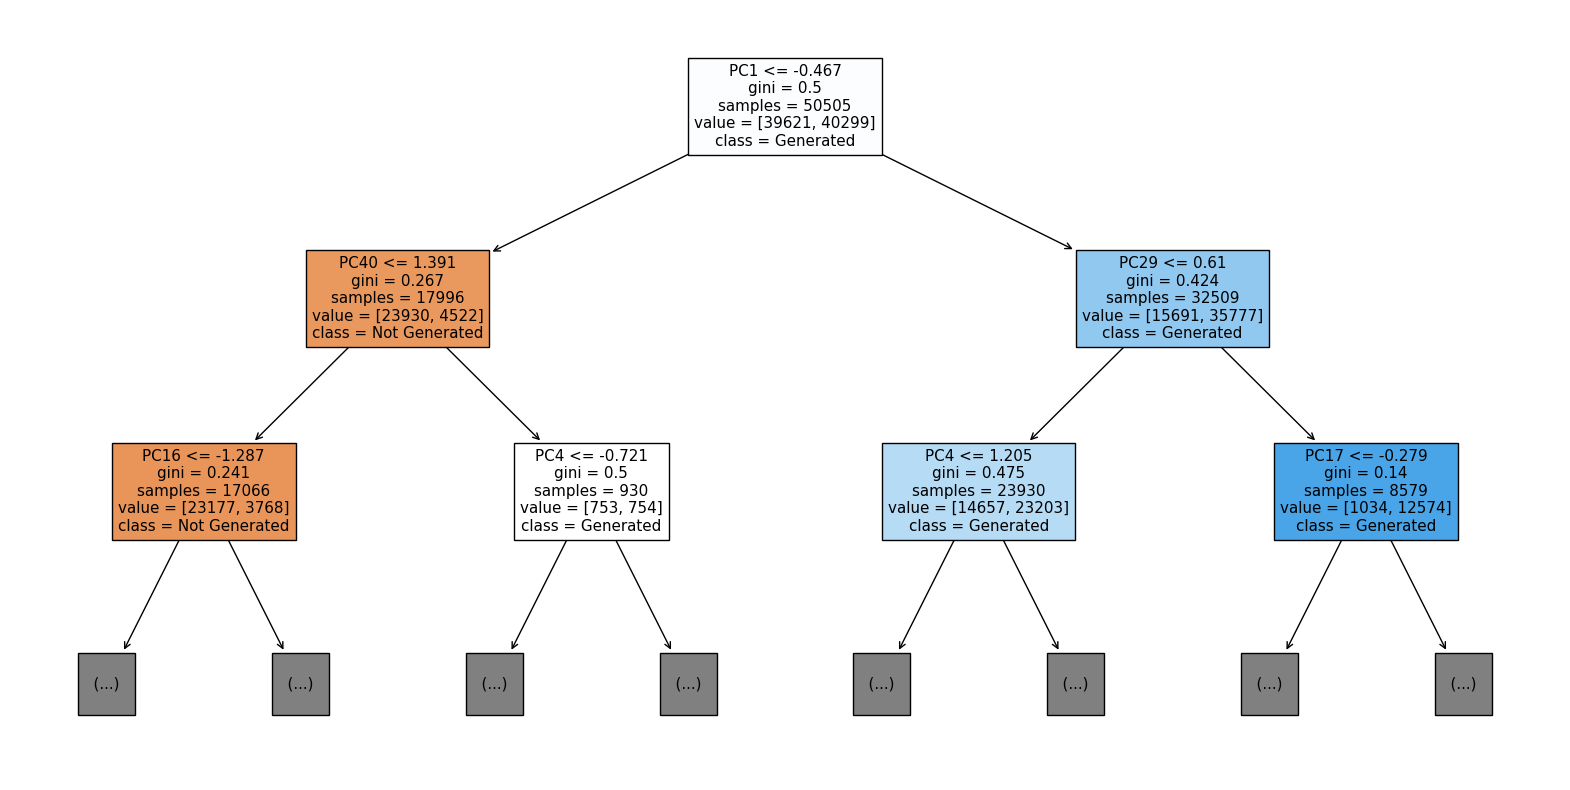

In [57]:
from sklearn.tree import plot_tree

# Selecting the first tree estimator from the Random Forest
tree_estimator = rf_clf.estimators_[0]

# Plot the selected decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_estimator, max_depth=2, feature_names=feature_names, class_names=['Not Generated', 'Generated'], filled=True)
plt.show()

In [58]:
from sklearn.tree import export_text

# Convert the Index to a list
feature_names_list = feature_names.tolist()

# Get text representation
text_representation = export_text(tree_estimator, feature_names=feature_names_list)
print(text_representation)

|--- PC1 <= -0.47
|   |--- PC40 <= 1.39
|   |   |--- PC16 <= -1.29
|   |   |   |--- PC15 <= 1.47
|   |   |   |   |--- PC64 <= 0.82
|   |   |   |   |   |--- PC6 <= -0.00
|   |   |   |   |   |   |--- PC9 <= -0.55
|   |   |   |   |   |   |   |--- PC77 <= 0.16
|   |   |   |   |   |   |   |   |--- PC47 <= -1.43
|   |   |   |   |   |   |   |   |   |--- PC26 <= -0.53
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- PC26 >  -0.53
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- PC47 >  -1.43
|   |   |   |   |   |   |   |   |   |--- PC13 <= -1.84
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- PC13 >  -1.84
|   |   |   |   |   |   |   |   |   |   |--- PC128 <= -2.36
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- PC128 >  -2.36
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dept

## SVM

In [59]:
# Import SVM classifier and accuracy score calculation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier with 'auto' gamma
svm_clf = SVC(gamma='auto', probability=True)

# Train the SVM model on scaled training data
svm_clf.fit(X_train_scaled, y_train)

# Predict using the trained SVM model on df unseen test data
svm_pred = svm_clf.predict(df_unseen_test_scaled)
svm_accuracy = accuracy_score(df_unseen_target, svm_pred)
print(f"SVM Accuracy on df unseen test: {svm_accuracy}")

# Predict using the trained SVM model on scaled test data
svm_pred = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy on scaled test data: {svm_accuracy}")

SVM Accuracy on df unseen test: 1.0
SVM Accuracy on scaled test data: 0.9968468468468469


In [60]:
import pickle
import gzip

# Save the SVM classifier, scaler, scaled training set, scaled test set, and scaled unseen test set to a dictionary
svm_data = {
    'svm_clf': svm_clf,
    'scaler': scaler,
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'df_unseen_test_scaled': df_unseen_test_scaled
}

# Save the dictionary to a compressed pickle file
with gzip.open('svm_and_scaled_data.pkl.gz', 'wb') as f:
    pickle.dump(svm_data, f)



### SVM Interpretability

  0%|          | 0/1 [00:00<?, ?it/s]

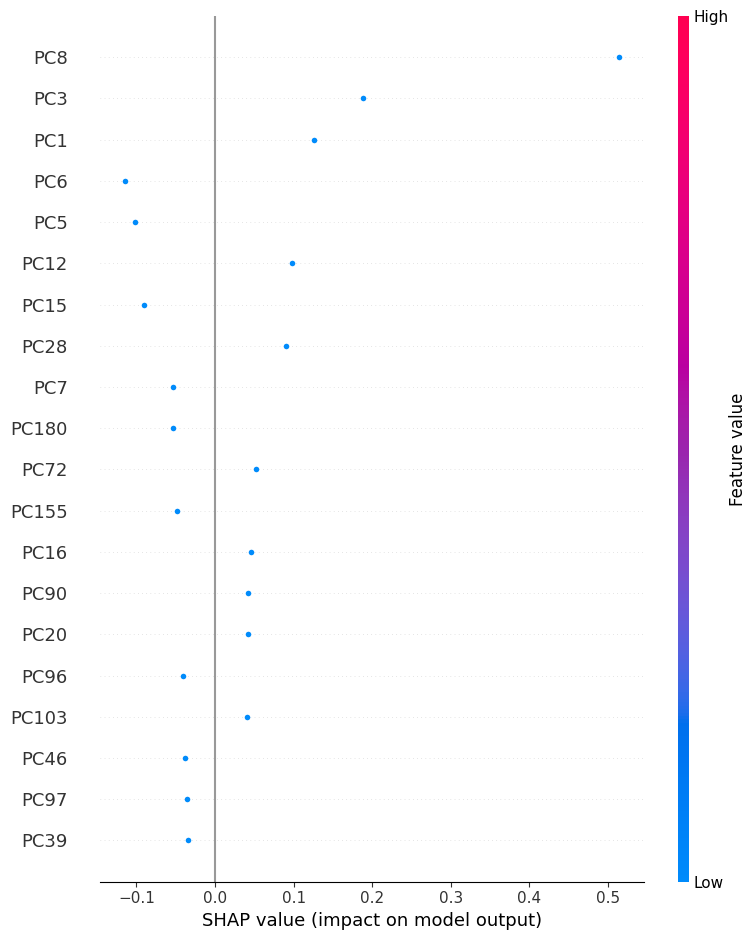

In [61]:
import shap

# Select a subset of test data for SHAP value computation
subset_index = 1  # using the first record as sample (***3 min runtime per record***)
X_test_subset = X_test_scaled[:subset_index]

# Select a background dataset for the explainer
background_data = shap.kmeans(X_train_scaled, k=10)

# Create a KernelExplainer using the SVM model
explainer = shap.KernelExplainer(svm_clf.predict, background_data)

# Compute SHAP values for the test set subset
shap_values = explainer.shap_values(X_test_subset)

# Plot the summary plot
shap.summary_plot(shap_values, X_test_subset, feature_names=df_combined.drop(['generated'], axis=1).columns)

In [62]:
import pandas as pd
from sklearn.inspection import permutation_importance

n_repeats = 5

# Use a smaller subset of the test data
subset_size = 50  # Adjust size of subset
X_test_subset = X_test_scaled[:subset_size]
y_test_subset = y_test[:subset_size]

# Compute permutation importance with parallel processing
perm_importance = permutation_importance(
    svm_clf, X_test_subset, y_test_subset,
    n_repeats=n_repeats, random_state=42, n_jobs=-1
)

# Get feature names from DataFrame columns
feature_names = df_combined.drop(['generated'], axis=1).columns

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
})

# Sort the DataFrame based on the importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset the index of the DataFrame
feature_importance_df = feature_importance_df.reset_index(drop=True)

# Display the DataFrame
feature_importance_df.head(15)

Feature  Importance
0      PC3       0.232
1      PC1       0.052
2      PC8       0.024
3     PC15       0.008
4    PC126       0.000
5    PC127       0.000
6    PC128       0.000
7    PC129       0.000
8    PC130       0.000
9    PC131       0.000
10   PC132       0.000
11   PC133       0.000
12   PC134       0.000
13   PC135       0.000
14   PC136       0.000

In [63]:
from lime import lime_tabular
from sklearn.calibration import CalibratedClassifierCV

feature_names = df_combined.drop(['generated'], axis=1).columns
i = 1

# Calibrate the classifier to provide probability estimates
calibrated_svm = CalibratedClassifierCV(svm_clf, method='sigmoid', cv='prefit')
calibrated_svm.fit(X_train_scaled, y_train)

# Use the calibrated classifier with LIME
explainer = lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=feature_names,
    class_names=['not_generated', 'generated'],
    mode='classification'
)

# Explain the prediction using the calibrated SVM
exp = explainer.explain_instance(X_test_scaled[i], calibrated_svm.predict_proba, num_features=30)
exp.show_in_notebook()

## SVM and Random Forest Evaluation

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Random Forest Classifier
rf_predictions = rf_clf.predict(X_test_scaled)
rf_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]
# Compute metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_predictions),
    'Precision': precision_score(y_test, rf_predictions),
    'Recall': recall_score(y_test, rf_predictions),
    'F1 Score': f1_score(y_test, rf_predictions),
    'ROC-AUC': roc_auc_score(y_test, rf_proba)
}

In [65]:
# SVM Classifier
svm_predictions = svm_clf.predict(X_test_scaled)
svm_proba = svm_clf.predict_proba(X_test_scaled)[:, 1]
# Compute metrics, now including ROC-AUC
svm_metrics = {
    'Accuracy': accuracy_score(y_test, svm_predictions),
    'Precision': precision_score(y_test, svm_predictions),
    'Recall': recall_score(y_test, svm_predictions),
    'F1 Score': f1_score(y_test, svm_predictions),
    'ROC-AUC': roc_auc_score(y_test, svm_proba)
}


In [66]:
# Compile all metrics into a single dictionary for easy comparison
all_metrics = {
    'SVM': svm_metrics,
    'Random Forest': rf_metrics
}

# Display the metrics in a table
print("{:<15} {:<10} {:<10} {:<10} {:<10}".format('Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'))
for model, metrics in all_metrics.items():
    print("{:<15} {:<10} {:<10} {:<10} {:<10}".format(
        model,
        f"{metrics.get('Accuracy', 'N/A'):.2f}",
        f"{metrics.get('Precision', 'N/A'):.2f}",
        f"{metrics.get('Recall', 'N/A'):.2f}",
        f"{metrics.get('F1 Score', 'N/A'):.2f}"
    ))

Model           Accuracy   Precision  Recall     F1 Score  
SVM             1.00       1.00       1.00       1.00      
Random Forest   0.99       0.99       0.99       0.99      


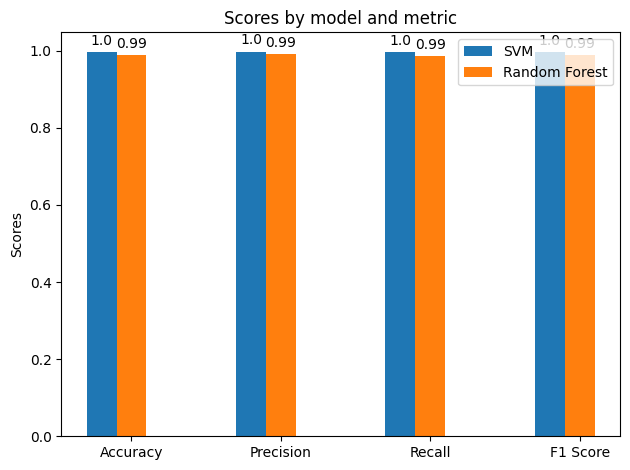

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_values = [svm_metrics[metric] for metric in metrics]
rf_values = [rf_metrics[metric] for metric in metrics]

# Setting up the bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, svm_values, width, label='SVM')
rects2 = ax.bar(x, rf_values, width, label='Random Forest')

# Added some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Applying the function to each group of bars
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

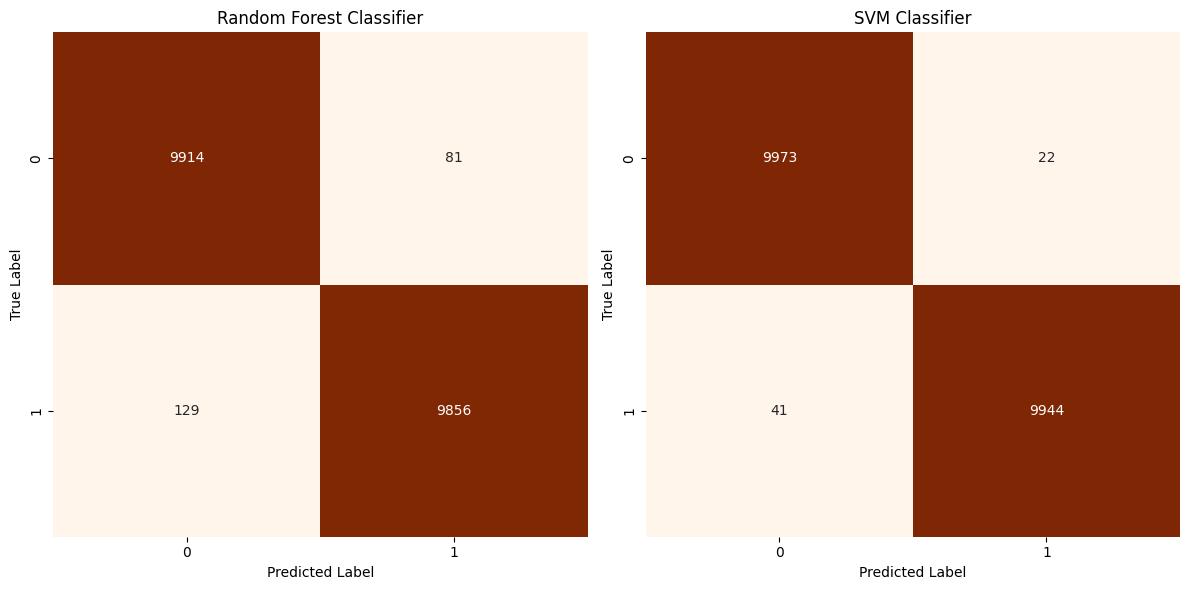

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix for Random Forest classifier
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Calculate the confusion matrix for SVM classifier
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrix
# Set the size of the figures
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Random Forest Classifier Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[0])
axes[0].set_title('Random Forest Classifier')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# SVM Classifier Confusion Matrix
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[1])
axes[1].set_title('SVM Classifier')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()